<a href="https://colab.research.google.com/github/joanjanku2000/sideprojects/blob/Billionare_Crud/Text_Classidication_and_Clustering_2_sentenctes_test_(cricket_and_ai)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('cairo')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Error loading cairo: Package 'cairo' not found in index


False

In [ ]:
# Importimi i librarive 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter

In [ ]:
stop = set(stopwords.words('english')) #heq nga fjalitë fjalët e ndaluara
exclude = set(string.punctuation)   #fshi shenjat e pikësimit
lemma = WordNetLemmatizer()         #bëj lematizimin e fjaleve

In [ ]:
# Përpunimi i fjalive ku heqim shenjat e pikësimit,fjalët e ndaluara dhe numrat 
def clean(doc):  #përdor funksionin clean i cili mer si parametër dokumentin
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop]) #metoda join pas heqjes së stop words
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude) #metoda join pas heqjes së shenjave të pikësimit
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())#metoda join pas lematizimit
    processed = re.sub(r"\d+","",normalized)
    y = processed.split()
    return y

In [ ]:
path = "/content/Sentences.txt" #deklaroj pathin në të cilin do të marr të dhënat

train_clean_sentences = []
fp = open(path,'r')       #hap file
for line in fp:           #kaloj në një cikël for për të gjitha të dhënat që do trajnohen
    line = line.strip()   #kthen stringat me hapësira të hequra
    cleaned = clean(line)   
    cleaned = ' '.join(cleaned)
    train_clean_sentences.append(cleaned)   #fjalitë e trajnuara i shtohen atyre të përpunuara
       
vectorizer = TfidfVectorizer(stop_words='english') 
X = vectorizer.fit_transform(train_clean_sentences)

#Krijimi i etiketave për 30 fjalitë qe do trajnohen 
y_train = np.zeros(30)
y_train[10:20] = 1
y_train[20:30] = 2

# Clustering i dokumentit me klasifikuesin KNN 
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(X,y_train)

# Clustering i të dhënave të trajnuara me teknikën K-means 
modelkmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(X)


KMeans(max_iter=200, n_clusters=3, n_init=100)

In [ ]:
# Test Sentences
import random
test_path = "/content/Sentences_Tests.txt"
test_clean_sentences = []
fp1 = open(test_path,'r')      

for line in fp1:           
    line = line.strip()     
    #cleaned = ' '.join(cleaned)
    test_clean_sentences.append(line)  

#random.shuffle(test_clean_sentences)
print(test_clean_sentences)

['Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps.', 'Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side either catching the ball after it is hit by the bat, but before it hits the ground, or hitting a wicket with the ball before a batter can cross the crease in front of the wicket.', 'When ten batters have been dismissed, the innings ends and the teams swap roles.', 'The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches.', "They communicate with two off-field scorers who record the match's statistical information.", 'Forms of cricket range from Twenty20, with each team batting for a single innings of 20 overs and the game generally lasting three hours, to Test matches played over five days.', 'Tradi

**#Faza e testimit**

In [ ]:

test_clean_sentence = []
for test in test_clean_sentences:
    cleaned_test = clean(test)
    cleaned = ' '.join(cleaned_test)
    cleaned = re.sub(r"\d+","",cleaned)
    test_clean_sentence.append(cleaned)
    
Test = vectorizer.transform(test_clean_sentence) 

true_test_labels = ['Cricket','AI','Chemistry']  #percaktoj etiketat sipas te cilave do klasifikohen
predicted_labels_knn = modelknn.predict(Test)  #parashikimet sipas KNN
predicted_labels_kmeans = modelkmeans.predict(Test)   #parashikimet sipas K-means

print ("\nBelow 3 sentences will be predicted against the learned nieghbourhood and learned clusters: ")

i = 0;
for sentence in test_clean_sentences:
  print(i,sentence)
  i+=1
       # test_sentences[0],"\n2. ",test_sentences[1],"\n3. ",test_sentences[2], "\n4. ",test_sentences[3] )

i = 0;
print ("\n-------------------------------PREDICTIONS BY KNN------------------------------------------")
for sentence in test_clean_sentences:
  print(sentence,":",true_test_labels[np.int(predicted_labels_knn[i])])
  i+=1


print ("\n-------------------------------PREDICTIONS BY K-Means--------------------------------------")
print ("\nIndex of Cricket cluster : ",Counter(modelkmeans.labels_[0:10]).most_common(1)[0][0])
print ("Index of Artificial Intelligence cluster : ", Counter(modelkmeans.labels_[10:20]).most_common(1)[0][0]) #Counter(modelkmeans.labels_[10:20]).most_common(1)[0][0]
print ("Index of Chemistry cluster : ",Counter(modelkmeans.labels_[20:30]).most_common(1)[0][0])

print("\n")
i = 0;
for sentence in test_clean_sentences:
  print(sentence,":",predicted_labels_kmeans[i])
  i+=1

print ("\n")






Below 3 sentences will be predicted against the learned nieghbourhood and learned clusters: 
0 Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 22-yard (20-metre) pitch with a wicket at each end, each comprising two bails balanced on three stumps.
1 Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side either catching the ball after it is hit by the bat, but before it hits the ground, or hitting a wicket with the ball before a batter can cross the crease in front of the wicket.
2 When ten batters have been dismissed, the innings ends and the teams swap roles.
3 The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches.
4 They communicate with two off-field scorers who record the match's statistical information.
5 Forms of cricket range from Twenty20, with each team batting for a single innings of 20 overs an

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy per KNN

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
y_test = []
i = 0
for i in range(0,18):
  if i < 8:
    y_test.append(0)
  if (i >=8 and i<=17):
    y_test.append(1)

print(y_test)

print("Accuracy KNN:",metrics.accuracy_score(y_test, predicted_labels_knn))


y_test_Kmeans = []
i = 0
for i in range(0,18):
  if i < 8:
    y_test_Kmeans.append(1)
  if (i >=8 and i<=18):
    y_test_Kmeans.append(0)
  
print(predicted_labels_kmeans)
print("Accuracy KMeans:",metrics.accuracy_score(y_test_Kmeans, predicted_labels_kmeans))

from sklearn.metrics import accuracy_score, classification_report
print("============== KNN ===================")
print(classification_report(y_test, predicted_labels_knn))
print("============== KMEANS ===================")
print(classification_report(y_test_Kmeans, predicted_labels_kmeans))




[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy KNN: 0.8333333333333334
[1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
Accuracy KMeans: 0.9444444444444444
============== KNN ===================
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         8
         1.0       1.00      0.70      0.82        10
         2.0       0.00      0.00      0.00         0

    accuracy                           0.83        18
   macro avg       0.60      0.57      0.57        18
weighted avg       0.91      0.83      0.85        18

============== KMEANS ===================
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.93         8

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Vlerat e parashikuara nga KMeans')

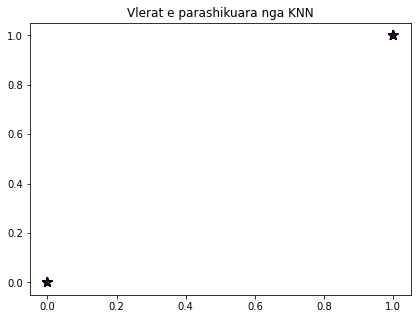

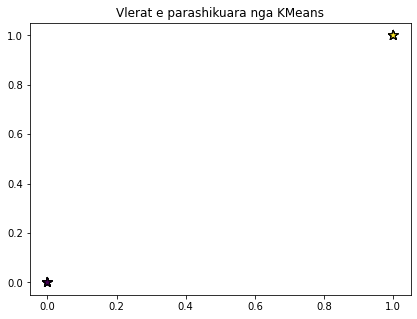

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_test,c=predicted_labels_knn, marker= '*', s=100,edgecolors='black')
plt.title("Vlerat e parashikuara nga KNN")

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(y_test_Kmeans,  y_test_Kmeans, c=predicted_labels_kmeans, marker= '*', s=100,edgecolors='black')
plt.title("Vlerat e parashikuara nga KMeans")

In [ ]:
!apt install libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc
The following NEW packages will be installed:
  libcairo-script-interpreter2 libcairo2-dev libpixman-1-dev libxcb-shm0-dev
0 upgraded, 4 newly installed, 0 to remove and 20 not upgraded.
Need to get 930 kB of archives.
After this operation, 3,986 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libcairo-script-interpreter2 amd64 1.15.10-2ubuntu0.1 [53.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libpixman-1-dev amd64 0.34.0-2 [244 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libxcb-shm0-dev amd64 1.13-2~ubuntu18

In [ ]:
!pip install pycairo
import cairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 340 kB 32.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycairo: filename=pycairo-1.21.0-cp37-cp37m-linux_x86_64.whl size=286850 sha256=f64b0cc674e51d4a5f60c7a6b2a6e5abb96013d5206d5cfc1e1b71a81aab8d42
  Stored in directory: /root/.cache/pip/wheels/69/1e/e8/ea8e397b1bea0fcbcffad6477c5ced6550a2adc259ed400405
Successfully built pycairo
